# My capstone project for MPP AI

In [1]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Initializing and loading

In [ ]:
import os
import csv
from matplotlib import image as mp_image
%matplotlib inline

def loadImages(folder, stopAfter10 = False):
    images = []
    n = 0
    for f in os.listdir(folder):
        n=n+1
        if (n>10 and stopAfter10):
            break
        fileWithPath = os.path.join(folder, file_name)
#        print("Loading image: " + fileWithPath)
        images.append( mp_image.imread(fileWithPath) )
    print("images: len=" + str(len(images))+ ", image shape: " + str(images[0].shape))    
    return images
    
def loadLabelsFromCsvWithHeader(filename):
    reader = csv.DictReader(open(filename),fieldnames=["file_id", "accent"])
    labels = []
    isFirst = True
    for row in reader:
        if (isFirst):
            isFirst = False
        else:
            labels.append(row["accent"])
    return labels

StopAfter10 = False

loaded_train_images = np.stack( loadImages("data/train", stopAfter10=StopAfter10), axis=0)
loaded_train_labels = loadLabelsFromCsvWithHeader("data/train_labels.csv")
if (StopAfter10):
    loaded_train_labels = loaded_train_labels[0:10]
    print("WARNING! ONLY 10 IMAGES WERE LOADED!")

train_images = loaded_train_images[:, :, :, 0]

plt.imshow(loaded_train_images[0,:,:,:])
plt.show()

In [123]:
from sklearn.model_selection import train_test_split

X = train_images.astype('float32')/255
Y = ku.to_categorical(np.array(loaded_train_labels)) # Make one-hot encoded numpy array
print("X shape: " + str(X.shape))

X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=0.25)
print("X_train shape: " + str(X_train.shape))
print("X_train shape: " + str(X_train.shape))
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_validate = X_validate.reshape((X_validate.shape[0],X_validate.shape[1],X_validate.shape[2],1))
print("X_train shape: " + str(X_train.shape))

print("X_train: " + str(X_train.shape))
print("X_validate: " + str(X_validate.shape))
print("Y_train: " + str(Y_train.shape))
print("Y_validate: " + str(Y_validate.shape))

print(Y_train)

X shape: (10, 128, 173)
X_train shape: (7, 128, 173)
X_train shape: (7, 128, 173)
X_train shape: (7, 128, 173, 1)
X_train: (7, 128, 173, 1)
X_validate: (3, 128, 173, 1)
Y_train: (7, 3)
Y_validate: (3, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


## Data preprocessing

In [124]:
X_train.shape
dummy = X_train.reshape((7,128,173,1))
dummy.shape

(7, 128, 173, 1)

## Creating the DNN

In [125]:
inputSize = X_train.shape
print(inputSize)

nn = models.Sequential()
#nn.add(layers.Dense(64, activation = 'relu', input_shape = (inputSize, )))
#nn.add(layers.Dense(3, activation = 'softmax'))

nn.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(inputSize[1],inputSize[2], 1)))
#nn.add(layers.MaxPooling2D(pool_size=(2, 2)))
#nn.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
#nn.add(layers.MaxPooling2D(pool_size=(2, 2)))
#nn.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
nn.add(layers.Flatten())
nn.add(layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
#nn.add(layers.Dropout(0.5))
nn.add(layers.Dense(3, activation = 'softmax'))

nn.summary()
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


(7, 128, 173, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 171, 32)      320       
_________________________________________________________________
flatten_8 (Flatten)          (None, 689472)            0         
_________________________________________________________________
dense_27 (Dense)             (None, 32)                22063136  
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 99        
Total params: 22,063,555
Trainable params: 22,063,555
Non-trainable params: 0
_________________________________________________________________


## Training the network, saving history

In [126]:
nr.seed(1025)

# batch size was 128
history = nn.fit(X_train, Y_train, 
    epochs = 5, batch_size = 64,
    validation_data = (X_validate, Y_validate))


Train on 7 samples, validate on 3 samples
Epoch 1/5
7/7 [==============================] - 109s 16s/step - loss: 1.7383 - acc: 0.2857 - val_loss: 1.9828 - val_acc: 0.3333
Epoch 2/5
7/7 [==============================] - 3s 429ms/step - loss: 1.7658 - acc: 0.5714 - val_loss: 1.5714 - val_acc: 0.3333
Epoch 3/5
7/7 [==============================] - 4s 570ms/step - loss: 1.4875 - acc: 0.2857 - val_loss: 1.8935 - val_acc: 0.3333
Epoch 4/5
7/7 [==============================] - 3s 367ms/step - loss: 1.2661 - acc: 0.5714 - val_loss: 1.8572 - val_acc: 0.3333
Epoch 5/5
7/7 [==============================] - 2s 286ms/step - loss: 2.2243 - acc: 0.2857 - val_loss: 1.3050 - val_acc: 0.3333


## Evaluation
Visualization of the history, checking for overfitting...
Estimating accuracy
Checking confusion matrix

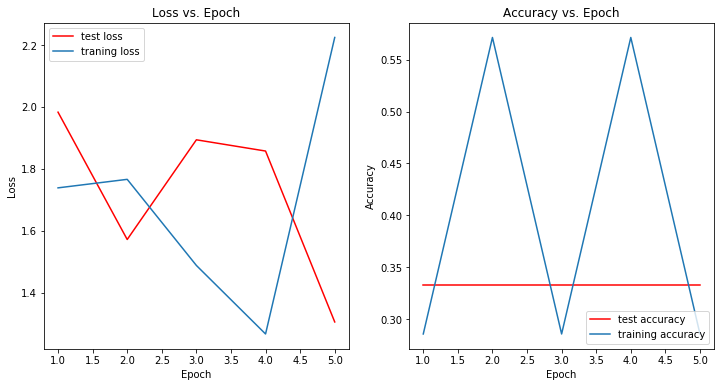

In [127]:
# Using the validation set, we do not need "nn.evaluate(test_images, test_labels)"...
fig = plt.figure(figsize=(12, 6))
ax1=plt.subplot(1, 2, 1)

def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history) 

ax1=plt.subplot(1, 2, 2)

def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)

In [84]:
from keras import metrics
predictions = nn.predict(X_validate)
matrix = metrics.confusion_matrix(Y_validate.argmax(axis=1), Y_pred.argmax(axis=1))

AttributeError: module 'keras.metrics' has no attribute 'confusion_matrix'

In [ ]:
## Evaluating new data

In [ ]:
loaded_test_images = np.stack( loadImages("data/test"), axis=0)
test_images = loaded_test_images[:, :, :, 0]
X_test = imageSetToArray(test_images)
Y_test = ku.to_categorical(np.array(loaded_train_labels))
